<a href="https://colab.research.google.com/github/sadikinisaac/NLPComedian/blob/master/NLP_Comedian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Getting the data
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [3]:
#Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [0]:
# # Pickle files for later use

# # Make a new directory to hold the text files
!mkdir transcripts

for i, c in enumerate(comedians):
     with open("transcripts/" + c + ".txt", "wb") as file:
         pickle.dump(transcripts[i], file)

In [0]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [7]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [8]:
# More checks
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [0]:
#Cleaning The Data

In [9]:
# Let's take a look at data again
next(iter(data.keys()))

'louis'

In [10]:
# Notice that dictionary is currently in key: comedian, value: list of text format
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [0]:
#  change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [0]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [13]:
# either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [14]:
# Let's take a look at the transcript for Ali Wong
data_df.transcript.loc['ali']

"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go to 

In [0]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [16]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,what’s up davis what’s up i’m home i had to bring it back here netflix said “where do you want to do the special la chicago new york” i was like...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august that’s pretty good all right hello hello chicago nice to see you again thank you...
louis,intro\nfade the music out let’s roll hold there lights do the lights thank you thank you very much i appreciate that i don’t necessarily agree wit...


In [0]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [18]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


In [0]:
#Organizing The Data

In [0]:
#Corpus

In [19]:
# Let's take a look at dataframe
data_df

,transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa..."
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello..."
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ..."
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo..."
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...


In [20]:
# Let's add the comedians' full names as well
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

data_df['full_name'] = full_names
data_df

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [0]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [0]:
#Document-Term Matrix

In [22]:
#  create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accents,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishments,according,accordingly,accoutrements,accurate,...,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youi,youll,young,younger,youngest,youre,youth,youthis,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,...,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,1,4,2,0,0,31,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,0,5,0,0,0,59,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,...,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,0,2,5,0,0,19,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,0,3,10,0,0,15,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,0,3,0,1,0,51,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,48,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,42,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,1,0,0,0,1,0,...,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,0,1,2,1,0,28,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,1,...,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,0,1,8,3,0,50,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [0]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [0]:
# Let's also pickle the cleaned data (before put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [25]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [26]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('tell', 13),
  ('yeah', 13),
  ('theyre', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('ive', 15),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15)],

In [27]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, gotta
---
anthony
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude
---
bo
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos
---
dave
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan
---
jim
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going
---
joe
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit
---
john
like, know, just, dont, said, clinton, im, thats, right, youre, little, hey, time, got
---
louis
like, just, know, dont, thats, youre, im, life, people, thing, gonna, hes, theres, cause
---
mike
like, im, know, said, just, dont, thats, thi

In [28]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'tell',
 'yeah',
 'theyre',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'did',
 'good',
 'school',
 'jokes',
 'yeah',
 'ive',
 'okay',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'eye',
 'said',
 'p

In [29]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [30]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'yeah',
 'said']

In [0]:
# Let's update  document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [0]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

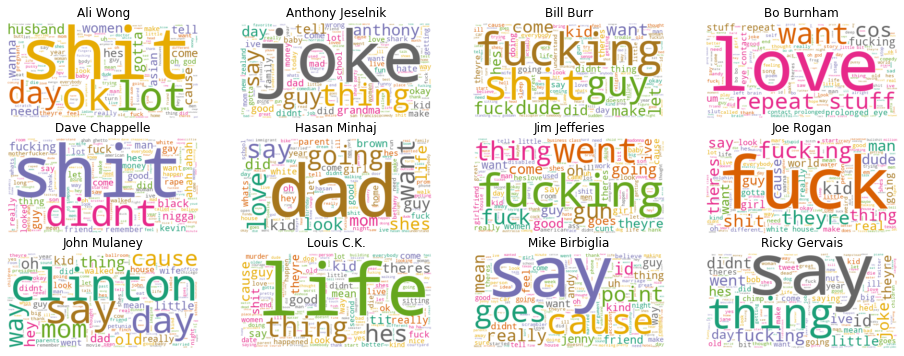

In [33]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [0]:
#Findings
#Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
#A lot of people use the F-word. Let's dig into that later.

In [0]:
#Number of Words
#Analysis

In [34]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


,comedian,unique_words
1,Anthony Jeselnik,983
9,Louis C.K.,1098
3,Bo Burnham,1272
6,Jim Jefferies,1313
0,Ali Wong,1341
8,John Mulaney,1389
4,Dave Chappelle,1404
7,Joe Rogan,1435
10,Mike Birbiglia,1494
5,Hasan Minhaj,1559


In [35]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2905,59,49.237288
3,Bo Burnham,1272,3165,60,52.750000
0,Ali Wong,1341,3283,60,54.716667
9,Louis C.K.,1098,3332,58,57.448276
4,Dave Chappelle,1404,4094,67,61.104478
6,Jim Jefferies,1313,4764,77,61.870130
10,Mike Birbiglia,1494,4741,76,62.381579
11,Ricky Gervais,1633,4972,79,62.936709
8,John Mulaney,1389,4001,62,64.532258
5,Hasan Minhaj,1559,4777,73,65.438356


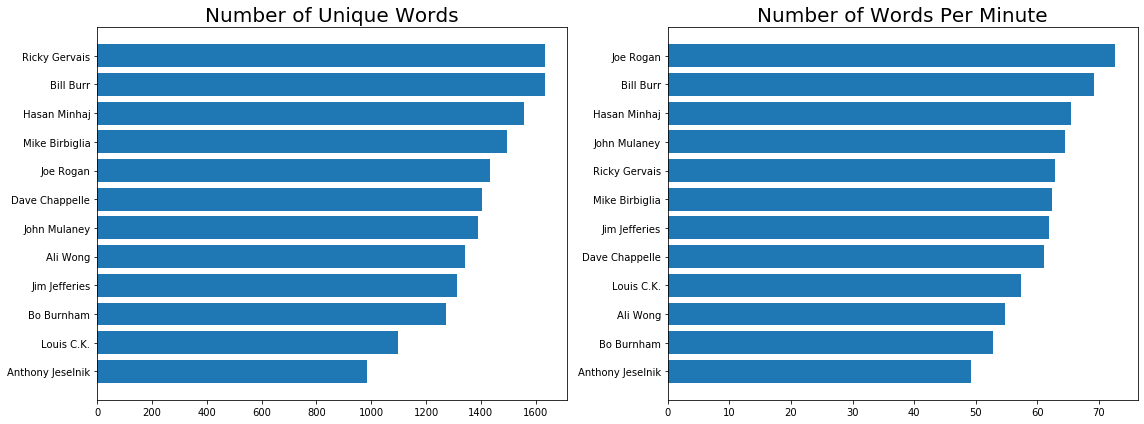

In [36]:
# Let's plot findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [0]:
#Findings
#Vocabulary
#Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
#Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


#Talking Speed
#Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
#Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
#Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

In [0]:
#Amount of Profanity
#Analysis

In [37]:
#  revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [38]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,63
bo,37,6
dave,65,45
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


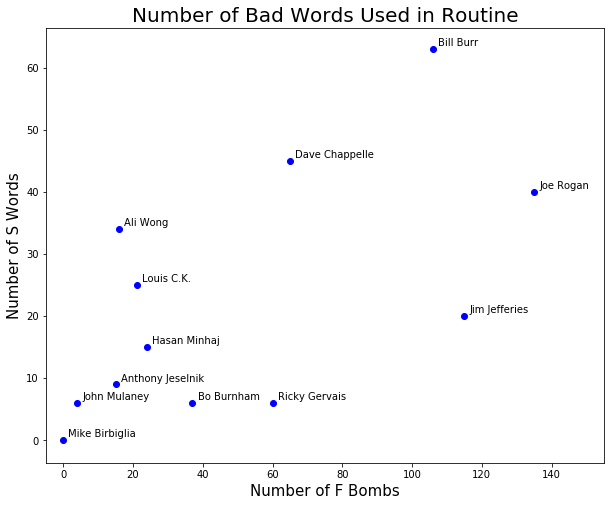

In [39]:
# Let's create a scatter plot of findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

In [0]:
#Findings

#Averaging 2 F-Bombs Per Minute!

In [0]:
#Sentiment Analysis

In [0]:
#Sentiment of Routine

In [40]:
# start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [41]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


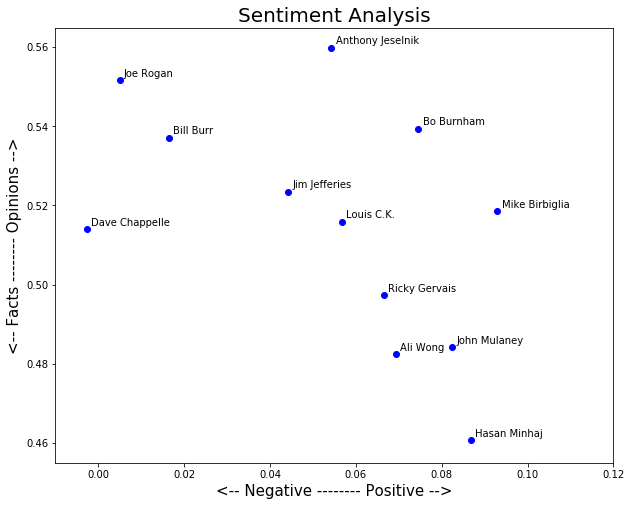

In [42]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [0]:
#Sentiment of Routine Over Time
#Instead of looking at the overall sentiment, 
#let's see if there's anything interesting about the sentiment over time throughout each routine.

In [0]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [44]:
# Let's take a look at data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle,-0.002690,0.513958
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj,0.086856,0.460619
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies,0.044224,0.523382
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney,0.082355,0.484137
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.,0.056665,0.515796


In [45]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [46]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [47]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [48]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.058467487373737366],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.035

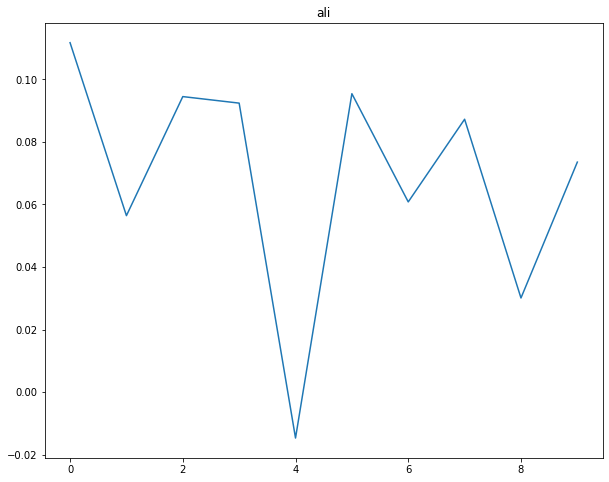

In [49]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

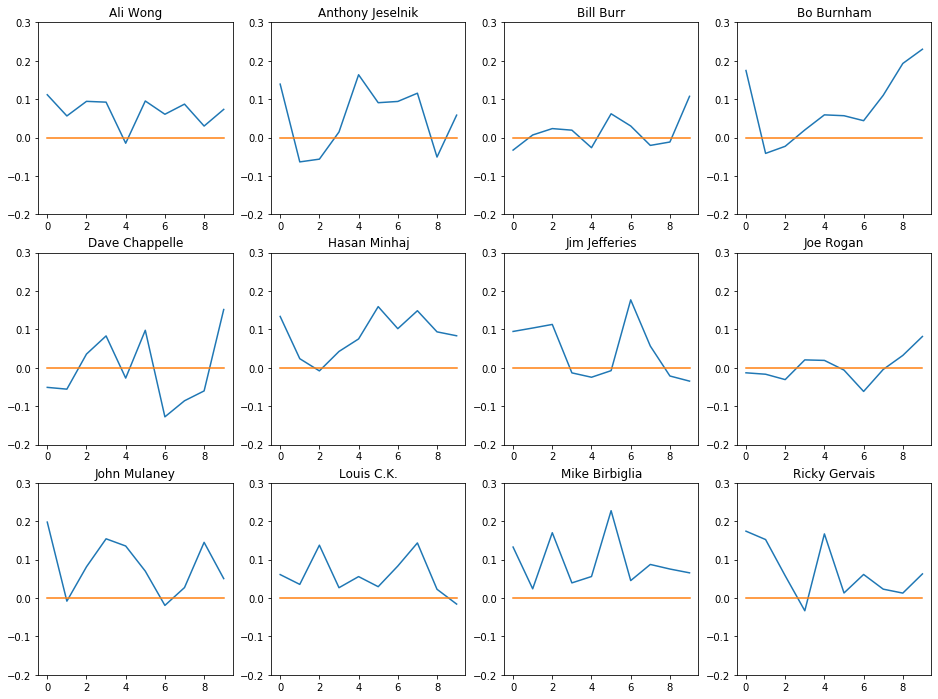

In [50]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [0]:
#Ali Wong stays generally positive throughout her routine. 
#Similar comedians are Louis C.K. and Mike Birbiglia.

#On the other hand, some pretty different patterns here like Bo Burnham who gets happier as 
#time passes and Dave Chappelle who has some pretty down moments in his routine.

In [0]:
#Topic Modeling

In [0]:
#Topic Modeling - Attempt #1 (All Text)

In [51]:
# Let's read in  document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,abroad,absofuckinglutely,absolute,absolutely,absorb,absorbing,abstain,abuse,abused,academically,acc,accent,accents,accept,acceptable,acceptance,accepted,access,accident,accidentally,accomplished,accomplishments,according,accordingly,accoutrements,accurate,...,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolanda,yolo,yooo,york,youd,youi,youll,young,younger,youngest,youth,youthis,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,...,0,1,0,9,0,0,0,1,0,0,1,0,1,0,0,0,1,4,2,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,6,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,...,1,0,0,3,0,0,0,1,0,0,0,0,0,0,1,1,0,5,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,...,0,0,0,5,0,5,0,0,0,0,0,0,0,1,0,2,0,2,5,0,0,0,0,0,9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,7,0,3,10,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,4,0,4,1,1,3,1,0,0,1,0,12,2,0,3,0,1,0,0,0,0,8,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,4,0,1,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,1,0,0,0,1,0,...,1,0,0,11,0,0,0,0,0,0,0,0,0,0,7,2,0,1,2,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,1,...,0,0,1,12,0,0,0,0,0,0,0,0,0,0,4,2,0,1,8,3,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [0]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [53]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
#  put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [0]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [0]:
#Now that have the corpus (term-document matrix) and id2word (dictionary of location: term),
# need to specify two other parameters - 
#the number of topics and the number of passes. 
#Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [56]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.006*"cause" + 0.005*"really" + 0.005*"oh" + 0.005*"day" + 0.005*"went" + 0.005*"thing" + 0.005*"fucking" + 0.004*"theyre" + 0.004*"hes" + 0.004*"going"'),
 (1,
  '0.009*"fucking" + 0.007*"fuck" + 0.006*"shit" + 0.006*"say" + 0.005*"want" + 0.005*"didnt" + 0.005*"going" + 0.005*"theyre" + 0.004*"did" + 0.004*"hes"')]

In [57]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.012*"fucking" + 0.008*"fuck" + 0.007*"shit" + 0.006*"theyre" + 0.006*"say" + 0.006*"didnt" + 0.006*"went" + 0.005*"going" + 0.005*"thing" + 0.005*"day"'),
 (1,
  '0.005*"say" + 0.005*"cause" + 0.005*"life" + 0.005*"going" + 0.005*"really" + 0.005*"dad" + 0.004*"says" + 0.004*"good" + 0.004*"hes" + 0.004*"shes"'),
 (2,
  '0.005*"love" + 0.005*"shit" + 0.005*"ok" + 0.005*"oh" + 0.004*"want" + 0.004*"stuff" + 0.004*"bo" + 0.004*"repeat" + 0.004*"fucking" + 0.003*"hes"')]

In [58]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.008*"say" + 0.008*"joke" + 0.006*"fucking" + 0.006*"day" + 0.006*"went" + 0.005*"didnt" + 0.005*"thing" + 0.005*"ive" + 0.005*"little" + 0.005*"id"'),
 (1,
  '0.009*"fucking" + 0.007*"shit" + 0.007*"fuck" + 0.006*"want" + 0.006*"going" + 0.006*"oh" + 0.005*"theyre" + 0.005*"say" + 0.005*"hes" + 0.005*"man"'),
 (2,
  '0.000*"say" + 0.000*"fucking" + 0.000*"oh" + 0.000*"fuck" + 0.000*"didnt" + 0.000*"shit" + 0.000*"hes" + 0.000*"went" + 0.000*"going" + 0.000*"cause"'),
 (3,
  '0.006*"cause" + 0.006*"life" + 0.006*"thing" + 0.005*"hes" + 0.005*"really" + 0.005*"old" + 0.005*"little" + 0.004*"say" + 0.004*"way" + 0.004*"good"')]

In [0]:
#These topics aren't looking too great. 
#try modifying parameters. Let's try modifying terms list as well.

In [0]:
#Topic Modeling - Attempt #2 (Nouns Only)

In [0]:
#One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). 
#Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

In [0]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [64]:
!pip install nltk

In [69]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [60]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my special ...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in the great...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was like nah ...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you boston i appre...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phone down ...
john,all right petunia wish me luck out there you will die on august thats pretty good all right hello hello chicago nice to see you again thank you ...
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with yo...


In [70]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_clean.transcript.apply(nouns))
data_nouns

,transcript
ali,ladies gentlemen stage ali hi thank hello na shit cause i ten minutes thank day year year people uh i im i girl thought im foremost metabolism gir...
anthony,thank thank people i em i francisco city world im stage place cities place bit today baby baby back car day dont monster i baby rock window window...
bill,thank thank pleasure georgia area oasis i june kind heat racism anybody look em drink lemonade man hell life shape man hate gym id week brutal i o...
bo,macdonald farm e i o farm pig e i i snort macdonald farm e i hes years male product giraffe sex degeneres head nipples hes years pursuit comedy re...
dave,jokes living stare work profound train thought alchemists transforms levity livelihood trance ♪ ♪ workinonit ♪ ♪ ♪ tune ♪ ♪ ♪ ♪ ahah ahah ahah ♪ ♪...
hasan,whats davis whats home i netflix la york i son davis california um year claps lord rings situation i ring powers lord rings compromise ring movie ...
jim,ladies gentlemen stage mr jim jefferies thank thats end tour tour i child ah time home i girlfriend pregnant months life decisions girl i way prob...
joe,ladies gentlemen joe fuck thanks phone fuckface i phone motherfuckers eyes goddamn phone whoo whoo strange i i im move francisco pot people edible...
john,petunia thats hello hello chicago thank crowd energy show okay thank crowds energy beginning places judge crowds way room birthday sign wait poste...
louis,music lets lights lights thank i i place place miles direction building shit town sentence i difference sidewalk street pedestrians people kind wa...


In [71]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,acc,accent,accents,acceptance,access,accident,accomplishments,accoutrements,accutane,achievement,acid,acquisitions,act,acting,actions,activity,actor,actors,ad,adam,adams,address,adjectives,adjustments,admirers,ads,adult,adults,advance,advantage,...,xmen,xray,ya,yall,yard,yards,yay,yeahmy,year,years,yecch,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolo,york,youd,youll,youth,youthis,youtube,youve,yulin,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,5,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,7,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,6,0,0,0,...,0,0,5,0,1,0,0,0,3,17,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,1,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,2,9,0,0,0,3,0,0,0,0,0,0,0,0,1,4,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,5,12,0,0,0,0,0,2,1,1,2,1,0,1,12,0,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,1,1,0,0,3,2,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,2,11,0,0,0,4,0,0,0,0,0,0,0,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4,1,0,0,5,0,0,0,0,0,0,0,0,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())


In [73]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.010*"day" + 0.010*"thing" + 0.006*"hes" + 0.005*"joke" + 0.005*"things" + 0.005*"man" + 0.005*"years" + 0.005*"women" + 0.004*"fuck" + 0.004*"cause"'),
 (1,
  '0.009*"shit" + 0.008*"life" + 0.008*"man" + 0.008*"thing" + 0.007*"day" + 0.007*"way" + 0.007*"hes" + 0.007*"cause" + 0.006*"fuck" + 0.006*"guy"')]

In [74]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"shit" + 0.010*"thing" + 0.009*"cause" + 0.009*"day" + 0.009*"man" + 0.008*"life" + 0.008*"guy" + 0.008*"fuck" + 0.008*"hes" + 0.007*"way"'),
 (1,
  '0.010*"dad" + 0.007*"day" + 0.007*"life" + 0.006*"joke" + 0.006*"school" + 0.006*"mom" + 0.006*"stuff" + 0.005*"man" + 0.005*"way" + 0.005*"shes"'),
 (2,
  '0.008*"joke" + 0.008*"thing" + 0.007*"years" + 0.007*"day" + 0.006*"hes" + 0.006*"id" + 0.005*"things" + 0.005*"nuts" + 0.005*"jenner" + 0.004*"woman"')]

In [75]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.012*"joke" + 0.010*"day" + 0.009*"thing" + 0.007*"things" + 0.006*"hes" + 0.006*"stuff" + 0.006*"years" + 0.006*"way" + 0.006*"jokes" + 0.005*"man"'),
 (1,
  '0.010*"dad" + 0.008*"way" + 0.007*"shes" + 0.007*"day" + 0.007*"night" + 0.007*"mom" + 0.007*"cause" + 0.007*"parents" + 0.006*"house" + 0.006*"hey"'),
 (2,
  '0.015*"thing" + 0.012*"life" + 0.011*"day" + 0.010*"cause" + 0.009*"women" + 0.008*"guy" + 0.008*"hes" + 0.007*"man" + 0.006*"fuck" + 0.006*"guns"'),
 (3,
  '0.017*"shit" + 0.011*"fuck" + 0.011*"man" + 0.008*"gon" + 0.008*"lot" + 0.008*"dude" + 0.007*"hes" + 0.007*"guy" + 0.007*"thing" + 0.007*"life"')]

In [0]:
#Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [0]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [77]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi welcome thank hello hello na shit cause i like ten minutes thank much um exciting day exciting year yea...
anthony,thank san francisco thank good people surprised i em i special san francisco correct city world im stage place favorite cities good place little b...
bill,right thank thank pleasure greater atlanta georgia area oasis nice i i june nice wasnt miserable horrible kind heat racism i anybody look em cold ...
bo,old macdonald farm e i i o farm pig e i i snort old macdonald farm e i i bo burnham hes years old male genetic product giraffe sex ellen degeneres...
dave,dirty jokes living stare most hard work profound train thought alchemists transforms levity livelihood trance ♪ ♪ ♪ ♪ ♪ workinonit ♪ ♪ ♪ ♪ tune ♪ ...
hasan,whats davis whats im home i netflix special la chicago new york i nah son davis california um good year married claps heavy heavy reverse lord rin...
jim,ladies gentlemen welcome stage mr jim jefferies thank i uh thats end tour im happy tour i child ah time home good um i girlfriend pregnant months ...
joe,ladies gentlemen joe fuck san francisco thanks i phone fuckface i phone motherfuckers eyes ta goddamn phone whoo high fuck whoo strange i sure i i...
john,right petunia august thats good right hello hello chicago nice nice thank wonderful crowd energy entire show okay thank crowds big energy beginnin...
louis,music lets lights lights thank much i i i nice place nicest place many miles direction building shit town sentence odd i difference sidewalk stree...


In [78]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,ablebodied,abortion,abortions,absolute,abuse,acc,accent,accents,acceptable,acceptance,access,accident,accomplished,accomplishments,accoutrements,accurate,accutane,achievement,acid,acoustic,acquisitions,act,acting,actions,active,activity,actor,actors,actual,ad,...,yard,yards,yay,yeahmy,yecch,yellow,yelp,yep,yes,yesterday,yo,yoda,yoga,yogurt,yokels,yoko,yolo,york,youd,youll,young,younger,youngest,youth,youthis,youtube,youve,yulin,yummy,yyou,ze,zealand,zee,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,1,1,5,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,4,1,10,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,4,1,1,2,1,0,1,12,0,1,0,1,0,0,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,3,2,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,1,0,2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,2,0,0,1,0,0,4,0,0,0,0,0,0,0,0,7,0,1,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,4,1,0,8,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [80]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"joke" + 0.003*"gun" + 0.003*"son" + 0.003*"parents" + 0.003*"mom" + 0.003*"door" + 0.003*"class" + 0.003*"friend" + 0.003*"comedy" + 0.003*"hasan"'),
 (1,
  '0.004*"mom" + 0.003*"ok" + 0.003*"joke" + 0.003*"bo" + 0.003*"eye" + 0.003*"clinton" + 0.002*"repeat" + 0.002*"ass" + 0.002*"dick" + 0.002*"parents"')]

In [81]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"mom" + 0.004*"hasan" + 0.004*"parents" + 0.004*"joke" + 0.003*"door" + 0.003*"tit" + 0.003*"nuts" + 0.002*"jenner" + 0.002*"brown" + 0.002*"dick"'),
 (1,
  '0.004*"joke" + 0.003*"bo" + 0.003*"um" + 0.003*"friend" + 0.003*"comedy" + 0.003*"jenny" + 0.003*"son" + 0.003*"ass" + 0.003*"guns" + 0.003*"repeat"'),
 (2,
  '0.006*"clinton" + 0.005*"wife" + 0.005*"mom" + 0.004*"cow" + 0.003*"parents" + 0.003*"gun" + 0.003*"hell" + 0.003*"movie" + 0.003*"dick" + 0.003*"jesus"')]

In [82]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.009*"joke" + 0.005*"mom" + 0.004*"parents" + 0.004*"hasan" + 0.003*"jokes" + 0.003*"anthony" + 0.003*"hell" + 0.003*"gun" + 0.003*"door" + 0.003*"comedy"'),
 (1,
  '0.006*"ok" + 0.005*"bo" + 0.004*"jenny" + 0.004*"repeat" + 0.004*"eye" + 0.003*"contact" + 0.003*"tit" + 0.003*"um" + 0.003*"andy" + 0.003*"husband"'),
 (2,
  '0.009*"ahah" + 0.007*"nigga" + 0.006*"gay" + 0.004*"son" + 0.004*"oj" + 0.004*"ghetto" + 0.004*"young" + 0.004*"motherfucker" + 0.004*"kevin" + 0.003*"friend"'),
 (3,
  '0.005*"ass" + 0.005*"mom" + 0.005*"clinton" + 0.005*"guns" + 0.004*"dick" + 0.004*"wife" + 0.004*"president" + 0.003*"cow" + 0.003*"dog" + 0.003*"parents"')]

In [0]:
#Identify Topics in Each Document

In [83]:
# final LDA model 
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.006*"mom" + 0.004*"parents" + 0.004*"ass" + 0.003*"friend" + 0.003*"door" + 0.003*"hasan" + 0.003*"class" + 0.003*"clinton" + 0.003*"jenny" + 0.003*"guns"'),
 (1,
  '0.013*"joke" + 0.010*"anthony" + 0.007*"grandma" + 0.006*"jokes" + 0.006*"mad" + 0.006*"shark" + 0.005*"san" + 0.005*"mom" + 0.004*"zealand" + 0.004*"today"'),
 (2,
  '0.005*"bo" + 0.004*"gay" + 0.004*"repeat" + 0.004*"ahah" + 0.003*"eye" + 0.003*"young" + 0.003*"contact" + 0.003*"tit" + 0.003*"jesus" + 0.003*"son"'),
 (3,
  '0.009*"joke" + 0.005*"nuts" + 0.005*"jenner" + 0.005*"hampstead" + 0.005*"chimp" + 0.004*"rape" + 0.004*"twitter" + 0.004*"tweet" + 0.004*"jane" + 0.004*"doctor"')]

In [0]:
#Topic 0: mom, parents
#Topic 1: husband, wife
#Topic 2: guns
#Topic 3: profanity

In [84]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(0, 'ali'),
 (1, 'anthony'),
 (2, 'bill'),
 (2, 'bo'),
 (2, 'dave'),
 (0, 'hasan'),
 (0, 'jim'),
 (0, 'joe'),
 (0, 'john'),
 (2, 'louis'),
 (0, 'mike'),
 (3, 'ricky')]

In [0]:
#Topic 0: mom, parents [Anthony, Hasan, Louis, Ricky]
#Topic 1: husband, wife [Ali, John, Mike]
#Topic 2: guns [Bill, Bo, Jim]
#Topic 3: profanity [Dave, Joe]

In [0]:
#Text Generation

In [85]:
# Read in the corpus, including punctuation!
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,Bo Burnham
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",Dave Chappelle
hasan,"[theme music: orchestral hip-hop] [crowd roars] What’s up? Davis, what’s up? I’m home. I had to bring it back here. Netflix said, “Where do you wa...",Hasan Minhaj
jim,"[Car horn honks] [Audience cheering] [Announcer] Ladies and gentlemen, please welcome to the stage Mr. Jim Jefferies! [Upbeat music playing] Hello...",Jim Jefferies
joe,"[rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan. [audience cheering and applauding] What the fuck is ...",Joe Rogan
john,"All right, Petunia. Wish me luck out there. You will die on August 7th, 2037. That’s pretty good. All right. Hello. Hello, Chicago. Nice to see yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily a...,Louis C.K.


In [86]:
# Extract only Ali Wong's text
ali_text = data.transcript.loc['ali']
ali_text[:200]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, l'

In [0]:
#Build a Markov Chain Function

#build a simple Markov chain function that creates a dictionary:

#The keys should be all of the words in the corpus
#The values should be a list of the words that follow the keys

In [0]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [88]:
# Create the dictionary for Ali's routine, take a look at it
ali_dict = markov_chain(ali_text)
ali_dict

{'Ladies': ['and'],
 'and': ['gentlemen,',
  'foremost,',
  'then',
  'have',
  'there’s',
  'resentment',
  'get',
  'get',
  'says,',
  'my',
  'she',
  'snatch',
  'running',
  'fighting',
  'yelling',
  'it',
  'she',
  'I',
  'I',
  'I',
  'we',
  'watched',
  'I',
  'have',
  'that',
  'recycling,',
  'disturbing',
  'it’s',
  'all',
  'just…',
  'be',
  'half-Vietnamese.',
  'his',
  'slide.',
  'your',
  'inflamed',
  'you’re',
  'I',
  'half-Japanese',
  'I’m',
  'half-Vietnamese.',
  'playing',
  'rugby.',
  'foremost,',
  'a',
  'emotionally',
  'I',
  '20',
  'neither',
  'I',
  'I–',
  'then',
  'it’s',
  'find',
  'start',
  'just',
  'caves',
  'gets',
  'is',
  'very',
  'for',
  'I',
  'she',
  'rise',
  'be',
  'eat',
  'watch',
  'be',
  'now',
  'most',
  'in',
  'then',
  'digitally',
  'then',
  'then',
  'then',
  'steady',
  'brings',
  'let',
  'reverberate',
  'say,',
  'my',
  'he',
  'when',
  'I’m',
  'sicker,',
  'sicker.',
  'sicker,',
  'sicker,',
  'pos

In [0]:
#Create a Text Generator

In [0]:
#It will take two things as inputs:

#The dictionary just created
#The number of words want to be generated

In [0]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [90]:
generate_sentence(ali_dict)

'Built on, you what that shit we got so they have a fucking baby, and.'